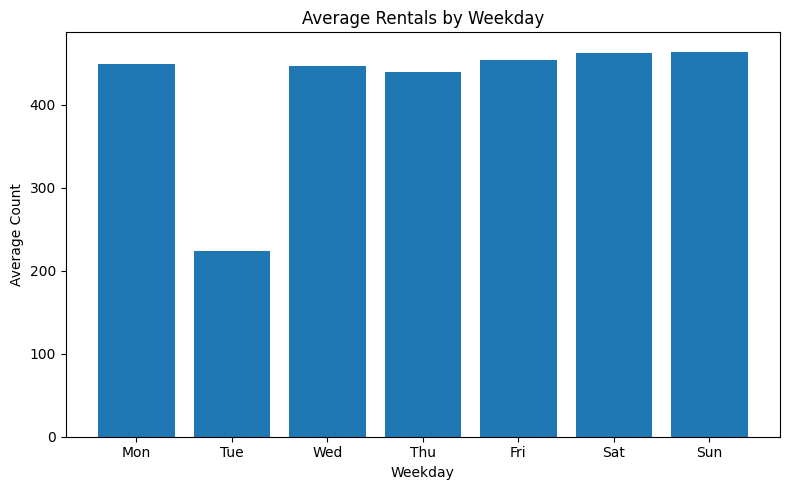

Saved: weekday_avg_rentals.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

rental_csv = "csv_exports/rental.csv"  # 変更可

df = pd.read_csv(rental_csv, parse_dates=["rental_date"])
df["date"] = df["rental_date"].dt.date
daily = df.groupby("date").size().rename("rentals").to_frame()
daily.index = pd.to_datetime(daily.index)

# 曜日列（0=Mon, 6=Sun）
daily["weekday"] = daily.index.weekday

# 曜日名に変換（例: 0 -> Mon, 6 -> Sun）
weekday_avg = daily.groupby("weekday")["rentals"].mean()
weekday_avg.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# 可視化：曜日名で表示
plt.figure(figsize=(8, 5))
plt.bar(weekday_avg.index, weekday_avg.values)
plt.title("Average Rentals by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Average Count")
plt.tight_layout()
plt.show()

# 結果をCSV保存（任意）
weekday_avg.to_csv("weekday_avg_rentals.csv", header=["avg_rentals"])
print("Saved: weekday_avg_rentals.csv")
